<a href="https://colab.research.google.com/github/PosgradoMNA/proyecto_integrador_equipo22/blob/main/Avance2_22Equipo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

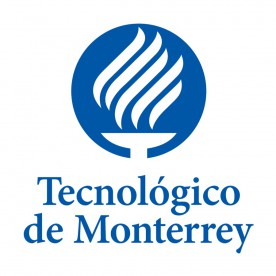


#Proyecto integrador (Equipo 22)

#### Nombre: ***José Ariel Corral Leon***
#### Matricula: ***A01793546***
----------------------------------------------------------

#### Nombre: ***Ernesto Nicanor Santillán Guerrero***
#### Matricula: ***A01793675***
----------------------------------------------------------

#### Nombre: ***Arturo Eduardo Loperena Gutiérrez***
#### Matricula: ***A01793641***




January 28th

- Detalle del proyecto
    * Elementos mecanicos de un Robot _(Hardware)_
    * Elementos intangibles de un Robot _(Software)_
    * Elementos de monitoreo de un Robot _(Ejes, Carga,Corriente, Voltaje)_
  
|Elemento | Unidad |
|---------|---------|
| 1.- Voltaje |V|
| 2.- Corriente |A|
| 3.- Carga de trabajo |Wl|
| 4.- Desviación de eje _(s)_ |Sigma|
| 5.- Precisión |mm|
| 6.- Velocidad |RPMs|


# Comienzo de codificación (se incluiran algunas notas con las descripciones)


# Librerias a utilizar

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys

# - Introducción




 Para poder realizar el manejo de datos de forma correcta tomaremos en cuenta los siguientes aspectos:


 | Características de la informacion y su manejo |
 ---
 Pre - Procesamiento
 Resolución de datos faltantes
 Formateo de valores
 Normalización de datos
 Binnado con python
 Migrando categorías de variables a cuantitativas

# Carga de los datos

In [ ]:
Load_factor = pd.read_csv('/content/LoadFactor.csv')
Joint_Deviation = pd .read_csv('/content/JointDev.csv')

# Iniciamos por tratar de conocer los datos

Hay diferentes formas de la interpretación de los datos segun el tipo de datos y quien los interprete:


| Tipo de datos de PANDAS  |  Tipo de dato  |  Descripción  |
| --- | --- | --- |
| Objeto  | String  | Numeros y "strings"  |
| int64  | int | Caracteres numéricos  |
| float64  | float  | Caracteres numéricos con puntos decimales |
| datetime64, timedelta NS  | N/A (pero se puede determinar por modulo de
tiempo segun las librerías)  | información de tiempo y fecha  |


**df.describe** = muestra una tabla de detalles con estimaciones matematicas para poder identificar anormalidades

**df.describe(include="all")** = incluye todas las características del Dataframe
**df.info() =  muestra toda la tabla resumida

# Panorama general de Load_factor Incluyendo head, tail, describe & info

In [ ]:
print(Load_factor.head)

<bound method NDFrame.head of            Hora/Tiempo Axis 1 Axis 2 Axis 3 Axis 4 Axis 5 Axis 6 Axis 7
0        1/1/2024 0:15      0      0      0      0      0      0      0
1        1/1/2024 0:55      0      0      0      0      0      0      0
2        1/1/2024 1:35      0      0      0      0      0      0      0
3        1/1/2024 2:15      0      0      0      0      0      0      0
4        1/1/2024 2:55      0      0      0      0      0      0      0
...                ...    ...    ...    ...    ...    ...    ...    ...
6265  31/12/2023 20:55      0      0      0      0      0      0      0
6266  31/12/2023 21:35      0      0      0      0      0      0      0
6267  31/12/2023 22:16      0      0      0      0      0      0      0
6268  31/12/2023 22:55      0      0      0      0      0      0      0
6269  31/12/2023 23:35      0      0      0      0      0      0      0

[6270 rows x 8 columns]>


In [ ]:
Load_factor.tail()

,Hora/Tiempo,Axis 1,Axis 2,Axis 3,Axis 4,Axis 5,Axis 6,Axis 7
6265,31/12/2023 20:55,0,0,0,0,0,0,0
6266,31/12/2023 21:35,0,0,0,0,0,0,0
6267,31/12/2023 22:16,0,0,0,0,0,0,0
6268,31/12/2023 22:55,0,0,0,0,0,0,0
6269,31/12/2023 23:35,0,0,0,0,0,0,0


In [ ]:
Load_factor.describe()

,Hora/Tiempo,Axis 1,Axis 2,Axis 3,Axis 4,Axis 5,Axis 6,Axis 7
count,6270,6270,6270,6270,6270,6270,6270,6270
unique,6270,350,426,664,542,354,677,150
top,1/1/2024 0:15,0,0,0,0,0,0,0
freq,1,1732,1732,1732,1732,1732,1732,1732


In [ ]:
Load_factor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6270 entries, 0 to 6269
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Hora/Tiempo  6270 non-null   object
 1   Axis 1       6270 non-null   object
 2   Axis 2       6270 non-null   object
 3   Axis 3       6270 non-null   object
 4   Axis 4       6270 non-null   object
 5   Axis 5       6270 non-null   object
 6   Axis 6       6270 non-null   object
 7   Axis 7       6270 non-null   object
dtypes: object(8)
memory usage: 392.0+ KB


In [ ]:
Load_factor['Axis 1'].value_counts()

0                  1732
100 (pg90, 26)     1358
100 (pg41, 36)      897
100 (pg41, 39)      548
100 (pg41, 40)      382
                   ... 
10.5 (pg71, 41)       1
34.9 (pg71, 41)       1
33.7 (pg41, 6)        1
0.6 (pg41, 39)        1
1.1 (pg61, 47)        1
Name: Axis 1, Length: 350, dtype: int64

# Panorama general de Joint_Deviation Incluyendo head, tail, describe & info

In [ ]:
Joint_Deviation.head()

,RobotKey,Time,Aux1,Aux2,Aux3,Aux4,Aux5,Aux6,Aux7,Aux8,Aux9,ErrorType,RobotProgram
0,1,1/1/2024 0:10,0,0,0,0,0,0,0,0,0,0,amain
1,1,1/1/2024 0:50,0,0,0,0,0,0,0,0,0,0,amain
2,1,1/1/2024 1:30,0,0,0,0,0,0,0,0,0,0,amain
3,1,1/1/2024 2:10,0,0,0,0,0,0,0,0,0,0,amain
4,1,1/1/2024 2:50,0,0,0,0,0,0,0,0,0,0,amain


In [ ]:
Joint_Deviation.tail()

,RobotKey,Time,Aux1,Aux2,Aux3,Aux4,Aux5,Aux6,Aux7,Aux8,Aux9,ErrorType,RobotProgram
319920,390,1/26/2024 21:00,0,0,0,0,0,0,0,0,0,0,Nombre de programa Prioridad No de paso
319921,390,1/26/2024 21:40,0,0,0,0,0,0,0,0,0,0,Nombre de programa Prioridad No de paso
319922,390,1/26/2024 22:20,0,0,0,0,0,0,0,0,0,0,Nombre de programa Prioridad No de paso
319923,390,1/26/2024 23:00,0,0,0,0,0,0,0,0,0,0,Nombre de programa Prioridad No de paso
319924,390,1/26/2024 23:40,0,0,0,0,0,0,0,0,0,0,Nombre de programa Prioridad No de paso


In [ ]:
Joint_Deviation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319925 entries, 0 to 319924
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   RobotKey      319925 non-null  int64 
 1   Time          319925 non-null  object
 2   Aux1          319925 non-null  int64 
 3   Aux2          319925 non-null  int64 
 4   Aux3          319925 non-null  int64 
 5   Aux4          319925 non-null  int64 
 6   Aux5          319925 non-null  int64 
 7   Aux6          319925 non-null  int64 
 8   Aux7          319925 non-null  int64 
 9   Aux8          319925 non-null  int64 
 10  Aux9          319925 non-null  int64 
 11  ErrorType     319925 non-null  int64 
 12  RobotProgram  319925 non-null  object
dtypes: int64(11), object(2)
memory usage: 31.7+ MB


In [ ]:
Joint_Deviation.describe()

,RobotKey,Aux1,Aux2,Aux3,Aux4,Aux5,Aux6,Aux7,Aux8,Aux9,ErrorType
count,319925.000000,319925.000000,319925.000000,319925.000000,319925.000000,319925.000000,319925.000000,319925.000000,319925.000000,319925.0,319925.0
mean,181.150085,0.651571,-0.281635,0.246502,0.112164,0.208099,0.467872,72.975160,1.210921,0.0,0.0
std,105.445619,272.803301,275.745655,306.730793,254.697352,220.274623,259.677514,758.011682,142.083878,0.0,0.0
min,1.000000,-18450.000000,-27942.000000,-26660.000000,-19886.000000,-18016.000000,-19418.000000,-33132.000000,-22176.000000,0.0,0.0
25%,90.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
50%,181.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
75%,271.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
max,394.000000,17056.000000,30016.000000,30466.000000,21854.000000,14706.000000,21488.000000,45216.000000,15304.000000,0.0,0.0


<Axes: >

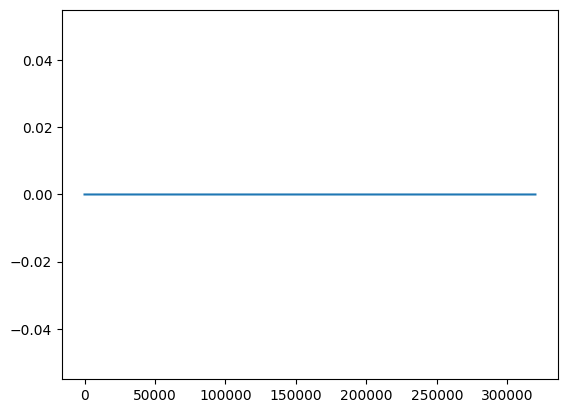

In [ ]:
# Esta columna no agrega valor
Joint_Deviation['ErrorType'].plot()

# Identificar de datos faltantes:

Tenemos que identificar si tenemos campos vacios, faltantes, en blancom, NaN o bien con un "?"

In [ ]:
Load_factor.isna().sum().sum()

0

In [ ]:
Joint_Deviation.isna().sum().sum()

0

**## Como se puede ver no hay datos faltantes en nuestras 2 tablas**

# Cardinalidad de  variables categóricas

In [ ]:
Load_factor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6270 entries, 0 to 6269
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Hora/Tiempo  6270 non-null   object
 1   Axis 1       6270 non-null   object
 2   Axis 2       6270 non-null   object
 3   Axis 3       6270 non-null   object
 4   Axis 4       6270 non-null   object
 5   Axis 5       6270 non-null   object
 6   Axis 6       6270 non-null   object
 7   Axis 7       6270 non-null   object
dtypes: object(8)
memory usage: 392.0+ KB


## Para este df las variables de Axis 1, Axis2,...,Axis 8 son variables tip objeto

In [ ]:
Load_factor.nunique()

Hora/Tiempo    6270
Axis 1          350
Axis 2          426
Axis 3          664
Axis 4          542
Axis 5          354
Axis 6          677
Axis 7          150
dtype: int64

In [ ]:
# mostrar datos para Axis 1
Load_factor['Axis 1'].unique()

array(['0', '13.9 (pg51, 5)', '1.4 (pg61, 44)', '60.5 (pg61, 18)',
       '61.2 (pg61, 18)', '1.2 (pg61, 44)', '77.5 (pg51, 11)',
       '61.4 (pg61, 18)', '77 (pg51, 11)', '100 (pg90, 26)',
       '61.6 (pg61, 18)', '1.3 (pg61, 44)', '100 (pg41, 36)',
       '86.9 (pg71, 19)', '100 (pg41, 39)', '99.7 (pg90, 26)',
       '100 (pg41, 40)', '1.4 (pg51, 34)', '100 (pg71, 20)',
       '100 (pg71, 22)', '0.7 (pg41, 48)', '39.5 (pg90, 18)',
       '0.5 (pg90, 29)', '0.4 (pg90, 29)', '25.1 (pg61, 19)',
       '0.7 (pg61, 47)', '0.7 (pg51, 32)', '75.5 (pg51, 11)',
       '75.9 (pg51, 11)', '0.4 (pg61, 44)', '87 (pg71, 19)',
       '1.1 (pg90, 29)', '87.1 (pg71, 19)', '72.5 (pg90, 26)',
       '90.4 (pg71, 19)', '88.1 (pg71, 19)', '1.2 (pg41, 48)',
       '61.3 (pg61, 19)', '1.3 (pg61, 46)', '0.9 (pg61, 46)',
       '1.2 (pg61, 46)', '1.4 (pg61, 46)', '0.7 (pg61, 46)',
       '1.5 (pg61, 46)', '62 (pg61, 19)', '62.2 (pg61, 19)',
       '0.4 (pg61, 46)', '13.7 (pg71, 29)', '28 (pg71, 38)',
     

In [ ]:
(Load_factor['Axis 2']).value_counts()

0                  1732
96.3 (pg71, 27)     148
96.4 (pg71, 27)     138
95.8 (pg71, 27)     137
96.1 (pg71, 27)     133
                   ... 
6.1 (pg41, 39)        1
5.4 (pg41, 39)        1
18.4 (pg90, 24)       1
6.3 (pg90, 30)        1
4.5 (pg61, 47)        1
Name: Axis 2, Length: 426, dtype: int64

In [ ]:
Joint_Deviation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319925 entries, 0 to 319924
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   RobotKey      319925 non-null  int64 
 1   Time          319925 non-null  object
 2   Aux1          319925 non-null  int64 
 3   Aux2          319925 non-null  int64 
 4   Aux3          319925 non-null  int64 
 5   Aux4          319925 non-null  int64 
 6   Aux5          319925 non-null  int64 
 7   Aux6          319925 non-null  int64 
 8   Aux7          319925 non-null  int64 
 9   Aux8          319925 non-null  int64 
 10  Aux9          319925 non-null  int64 
 11  ErrorType     319925 non-null  int64 
 12  RobotProgram  319925 non-null  object
dtypes: int64(11), object(2)
memory usage: 31.7+ MB


In [ ]:
Joint_Deviation.nunique()

RobotKey          352
Time            11151
Aux1             1221
Aux2             1279
Aux3             1195
Aux4             1032
Aux5             1208
Aux6             1080
Aux7             4694
Aux8              567
Aux9                1
ErrorType           1
RobotProgram      330
dtype: int64

In [ ]:
# se enlistan todos los nombres de programas de robot
Joint_Deviation['RobotProgram'].unique()

array(['amain', 'cl_test', 'cl4_vshift', 'pg74', 'buffer_bd',
       'buffer_bl7', 'nx4_vshift',
       'Nombre de programa Prioridad No de paso', 'pg41', 'pg52', 'pg75',
       'bd_vshift', 'bl7_vshift', 'pg72', 'vcheck', 'pg11', 'buffer_nx',
       'pg51', 'path_speed', 'pg61', 'a_test', 'pg9998',
       'buffer_bd_rack5', 'bd_vshift3rd', 'buffer_cl4', 'nx5_vshift',
       'bd_vshift2nd', 'bd_vshift1st', 'pg77', 'buffer_nx4', 'pg43',
       'cl4_test', 'pg76', 'bd_vshift4th', 'pg53', 'pg55', 'v_shift_bl',
       'pg71', 'shuttle_bd', 'shuttle_bl7', 'turnjig_bd', 'vs_bd4',
       'vs_cl4', 'vs_nx4', 'pg57', 'v_shift_bl1', 'pg62', 'pg80', 'pg64',
       'pg44', 'pg54', 'bl7_buffer', 'pg14', 'pg90', 'pg16', 'pg42',
       'buffer_bl', 'vs_bl', 'pg73', 'vs_cl', 'pg17', 'vs_nx', 'pg15',
       'pg56', 'pg58', 'pg19', 'buffer_bd4', 'buffer_bd4gt', 'pg78',
       'vs_bl7', 'pg79', 'pg66', 'buffer_bl7m5', 'vs_bl7m5', 'vs_bd4gt',
       'pg65', 'pg13', 'bl7_com_loading', 'pg12', 'pg18', 'doki

#Distribuciones sesgadas en el conjunto de datos y tendencias temporales


<Axes: >

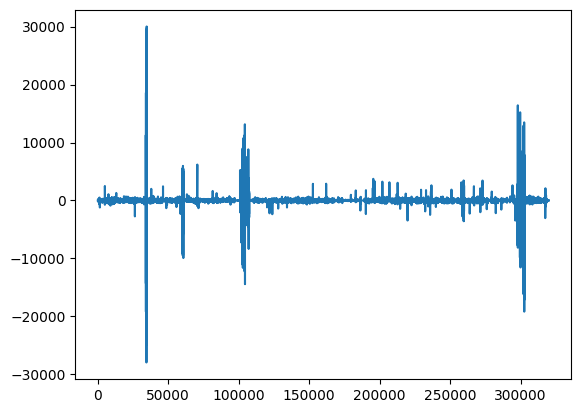

In [ ]:
Joint_Deviation['Aux2'].plot()

<Axes: xlabel='Time', ylabel='Aux1'>

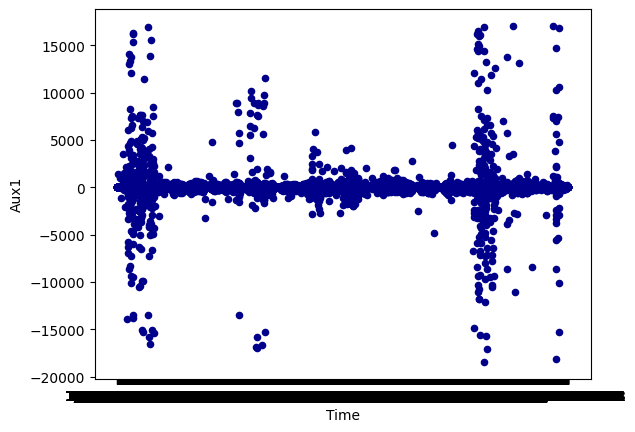

In [ ]:
Joint_Deviation.plot.scatter(x='Time',
                      y='Aux1',
                      c='DarkBlue')

In [ ]:
Joint_Deviation.groupby('RobotProgram')[['Aux2']].mean()

,Aux2
RobotProgram,
??,0.000000
Nombre de programa Prioridad No de paso,0.088144
a_main,0.000000
a_test,0.000000
amain,-0.142070
...,...
vs_nx4_pa,0.000000
vs_nx4_plt,-286.000000
vs_nx4_plt_as,-2.000000


In [ ]:
# Identificar que programas tienen mas desviacion en variables Aux
Joint_Deviation.groupby(["RobotProgram"])["Aux1"].mean().sort_values(ascending=False).head(20)

RobotProgram
bd4_bed_unchuck    2247.000000
pg9990              808.000000
bl7_common          482.448276
bdm_slide_1         450.000000
bd4_a_jig_pick      203.333333
pg2                 178.000000
pg174               126.000000
buffer_bl74dr       121.619048
turn_load_bd4       116.000000
com_bl7_seal_4d     111.000000
tvirse_load_bd4      97.866667
com_bl7_5dr_sea      92.000000
vs_nx4_plt           67.555556
bd4_unload_a         65.000000
pg15                 58.800000
vs_bdm4_8            58.000000
vs_nx4               54.500000
bd_com_clamp         51.000000
pg79                 43.384615
vs_cl4               38.938776
Name: Aux1, dtype: float64

## **En este caso se observa que las variables AUX tienen variabilidad en el tiempo. Pendiente analizar con mas detalle, para determinar si se requiere aplicar algun tipo de transformacion.**
## Importante determinar porque hay algunos programas que tienen una mayor desviación.

# Conclusión:

# Para este entregable nos falta investigar mas sobre los tipos de programas de robot en los que nos queremos enfocar. Posiblemente sea necesario conseguir mas información. En general los datos por su naturaleza se pueden graficar contra el eje del tiempo. No encontramos valores faltantes y si encontramos algunas columnas que no agregan valor.